In [1]:
#importing files
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from fbprophet import Prophet

In [2]:
#reading dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AllNaturalDisasters.csv")


In [3]:
#vieweing the top 5 rows within the dataframe
dataset.rename(columns = {'Number of reported natural disasters (reported disasters)':'num'}, inplace = True)
dataset.head(5)


,Entity,Code,Year,num
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [4]:
#dataset.info()
#dropping all columns except year and co2
dataset.drop(dataset.columns.difference(['Year','num']), 1, inplace=True)
dataset=dataset.rename(columns={'Year':'yr', 'num':'y'})
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,yr,y
0,1900,5
1,1901,2
2,1902,9
3,1903,8
4,1904,2


In [5]:
year_max = dataset['yr'].max()
year_min = dataset['yr'].min()

length = year_max - year_min +1

#creating a list of years to store all year values
yr_val = dataset['yr']

dataset['ds'] = [str(yr)+'/1/1' for yr in yr_val]


dataset['ds'] = pd.to_datetime(dataset['ds'])
dataset.head(5)

,yr,y,ds
0,1900,5,1900-01-01
1,1901,2,1901-01-01
2,1902,9,1902-01-01
3,1903,8,1903-01-01
4,1904,2,1904-01-01


In [6]:
train = dataset.iloc[:100,:]
test = dataset.iloc[100:,:]

In [7]:
#Forecasting using fbprophet

pred = Prophet()
pred.fit(train)
#predict the next n number of years, substitute n in periods, frequency is yearly
future = pred.make_future_dataframe(periods=35, freq = 'Y')
forecast = pred.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1900-01-01,1.525559,-17.670631,21.211210
1,1901-01-01,1.791523,-15.814192,19.869139
2,1902-01-01,2.052660,-16.161893,20.407932
3,1903-01-01,2.309038,-16.474560,20.460402
4,1904-01-01,2.560733,-17.253794,20.963008
...,...,...,...,...
130,2029-12-31,531.085706,497.358566,562.416809
131,2030-12-31,538.974636,503.892589,569.939776
132,2031-12-31,546.859282,509.869324,580.016866
133,2032-12-31,555.098363,520.145172,588.644039


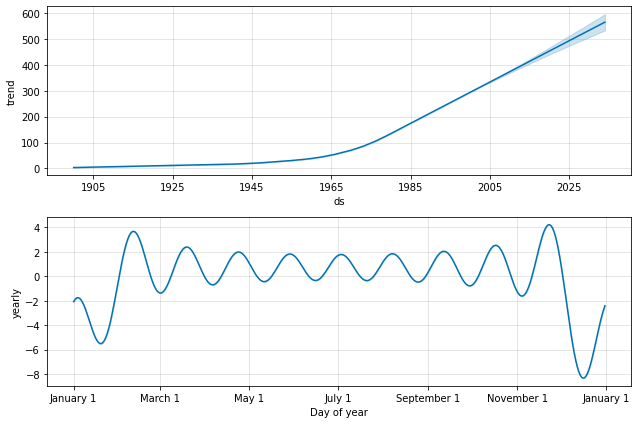

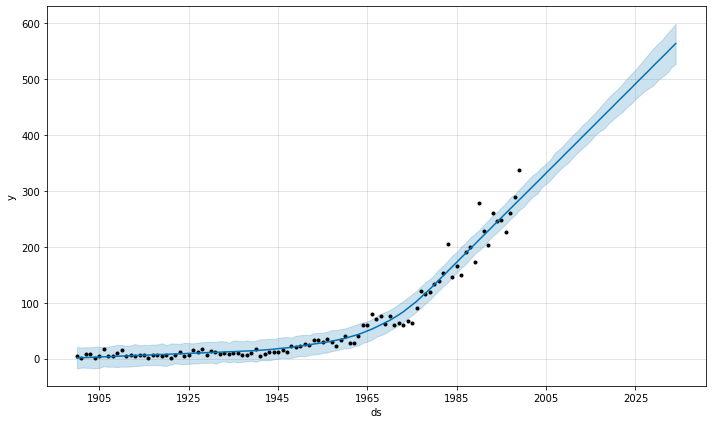

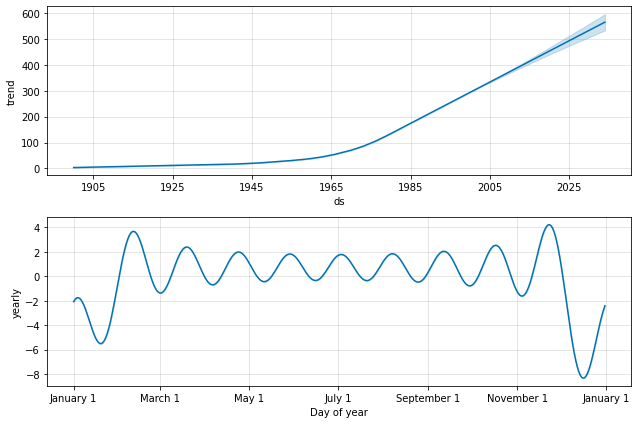

In [9]:
#plotting the forecast and the forecast components
pred.plot(forecast)
pred.plot_components(forecast)

In [10]:
#saving the data
forecast.to_csv("/content/drive/MyDrive/Colab Notebooks/Prophet for Disasters.csv")

In [11]:
forecast_sub  = forecast[['ds','yhat']]
forecast_sub['ds'] = pd.to_datetime(forecast_sub['ds'])
test = test[['ds','y']]
test['ds'] = pd.to_datetime(test['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
test['year'] = test['ds'].dt.to_period('Y')
forecast_sub['year'] = forecast_sub['ds'].dt.to_period('Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
eval = test.merge(forecast_sub, on=['year'], how='left')
eval['abs_err'] = abs(eval['yhat'] - eval['y'])
total_y = sum(eval['y'])
total_error = sum(eval['abs_err'])
accuracy = 1 - (total_error/total_y)
print("Accuracy:", accuracy*100 , " %")

Accuracy: 80.65841498796324  %
